> This notebook compares the results obtained with the proposed method and RANSAC

## Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})
plt.rcParams['font.size'] = '16'

## Load data

In [3]:
ransac = pd.read_csv('../ransac/2022-09-27-14-46-03/front-right.csv')

In [4]:
ours = pd.read_csv('../processed/2022-09-27-14-46-03/front-right.csv')

## Aligning solutions

In [18]:
aligned = []

In [19]:
ours.shape

(9060, 3)

In [20]:
for i in range(ours.shape[0]):
    t = ours.Time.iat[i]
    temp = np.abs(ransac.Time.to_numpy() - t)
    id = np.argmin(temp)
    if temp[id] < 0.1:
        aligned.append([t, ours.ref.iat[i], ours.est.iat[i], ransac.speed.iat[id]])

In [21]:
aligned = np.array(aligned, dtype=np.float64)

In [22]:
aligned.shape

(9060, 4)

## Splitting the trajectory

In [43]:
seq07 = aligned[725:8250]

## Saving segments

In [44]:
df = pd.DataFrame(seq07, columns=['Time','ref','proposed','ransac'])
df.to_csv('../processed/2022-09-27-14-46-03/seq07.csv', index=False)

## Computing RMSE

In [45]:
idx = np.isnan(seq07[:,3])
print(f'RANSAC: {mean_squared_error(seq07[~idx,1], seq07[~idx,3], squared=False)} m/s')
print(f'OURS: {mean_squared_error(seq07[~idx,1], seq07[~idx,2], squared=False)} m/s')

RANSAC: 0.1843480937446885 m/s
OURS: 0.20193642658510683 m/s


## Plotting results

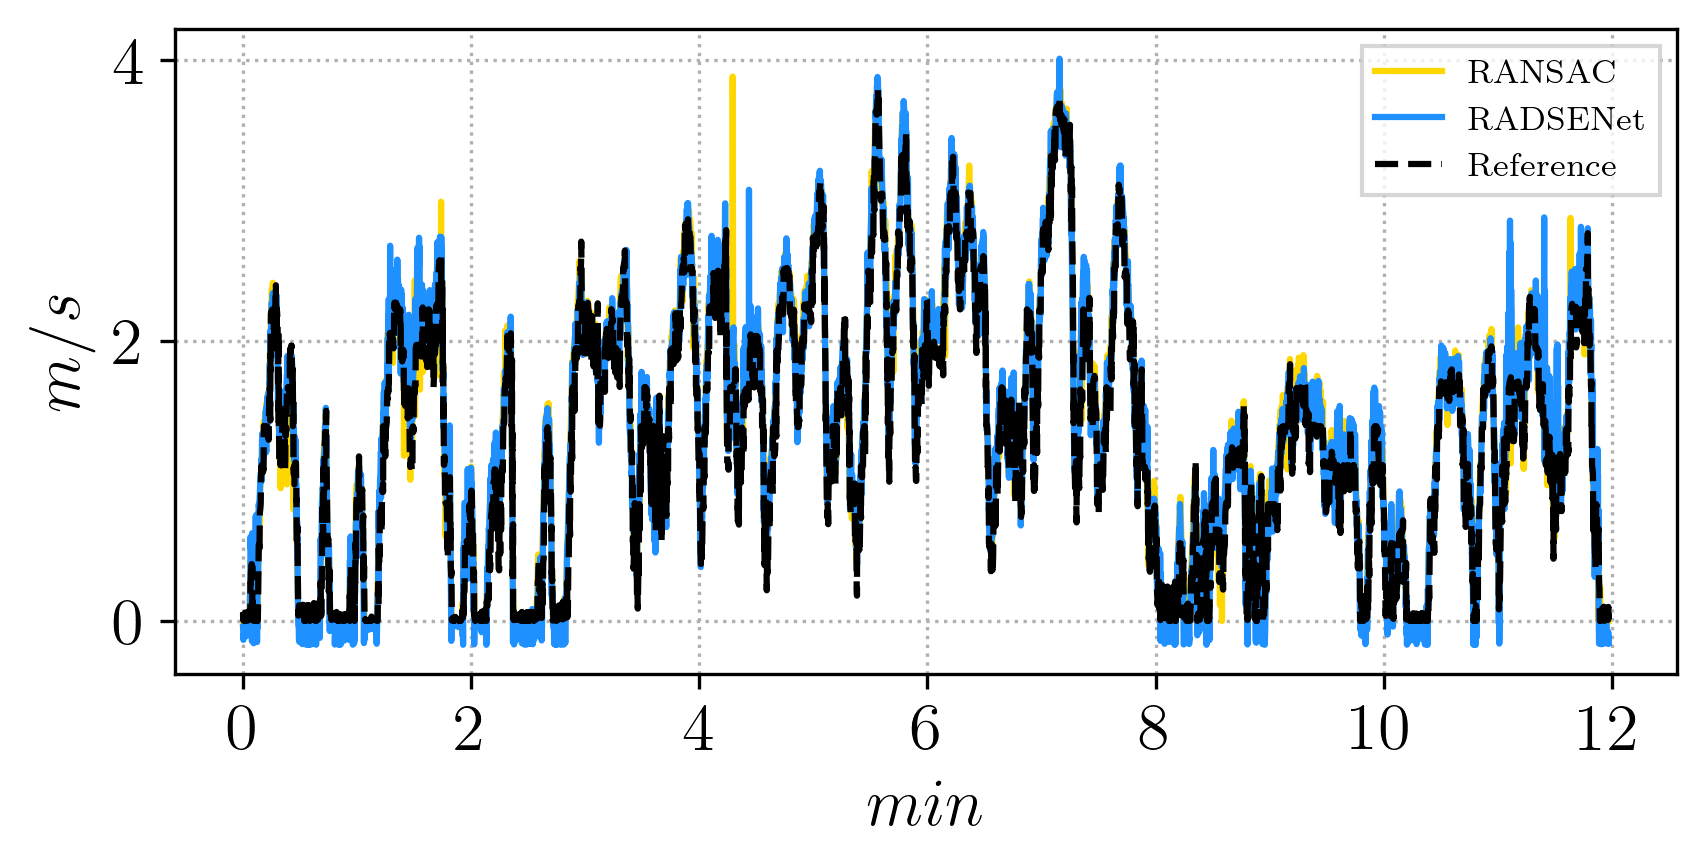

In [50]:
fig, ax = plt.subplots(figsize=(6,3))
plt.tight_layout()

ax.set_ylabel('$m/s$')
ax.set_xlabel('$min$')

ax.grid(linestyle=':')

# RANSAC
ax.plot((seq07[:,0]-seq07[0,0])/60, seq07[:,3], 'gold', label='RANSAC')

# Ours
ax.plot((seq07[:,0]-seq07[0,0])/60, seq07[:,2], 'dodgerblue', label='RADSENet')

# Reference
ax.plot((seq07[:,0]-seq07[0,0])/60, seq07[:,1], '--k', label='Reference')

ax.legend(fancybox=False, fontsize=8)

plt.savefig('comparison.png', dpi=300);
plt.show()